<img src="banner-4-3.png">


In [1]:
# import pandas for data analysis
import pandas as pd 

# import numpy for numerical computation
import numpy as np

# import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

#import scipy 
import scipy 
from scipy.stats import skew
from scipy.stats import kurtosis
import pylab as p

 
import statsmodels.api as sm


In [251]:
df=pd.read_csv(r'advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## About Dataset

- This dataset expresses sales according to the type of advertisement and the size of cost.
- The dataset contains 3 features [TV,Radio,Newspaper] and target variable Sales.

### Understanding the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
print('Shape of Dataset',df.shape)

Shape of Dataset (200, 4)


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# checking for the null values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

- No null value in the dataset.

In [252]:
# calculate the Skewness
print('Skewness')
print('TV')
print(round(skew(df.TV,axis=0,bias=True),4))

print('Radio')
print(round(skew(df.Radio,axis=0,bias=True),4))

print('Newspaper')
print(round(skew(df.Newspaper,axis=0,bias=True),4))

Skewness
TV
-0.0693
Radio
0.0935
Newspaper
0.888


In [253]:
# Calculate the Kurtosis
print('Kurtosis')
print('TV')
print(round(kurtosis(df.TV,axis=0,bias=True),4))

print('Radio')
print(round(kurtosis(df.Radio,axis=0,bias=True),4))

print('Newspaper')
print(round(kurtosis(df.Newspaper,axis=0,bias=True),4))

Kurtosis
TV
-1.2259
Radio
-1.259
Newspaper
0.6035


### Outlier Analysis

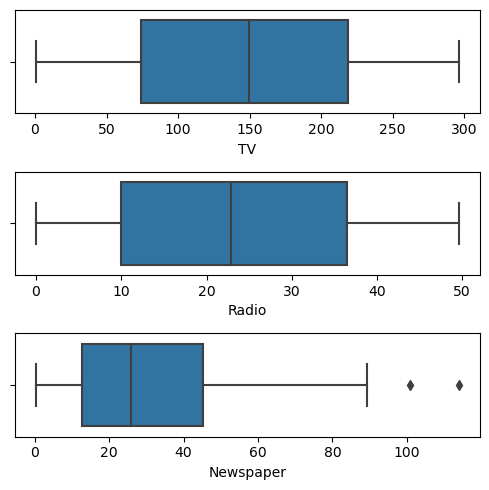

In [254]:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Radio'],ax=axs[1])
plt3=sns.boxplot(df['Newspaper'],ax=axs[2])
plt.tight_layout()
plt.show()

- There are no considerable outliers present in the data.

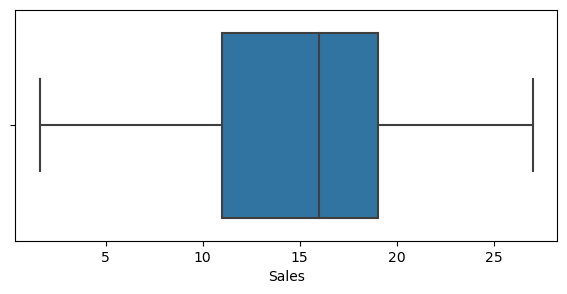

In [255]:
plt.figure(figsize=(7,3))
sns.boxplot(df['Sales'])
plt.show()

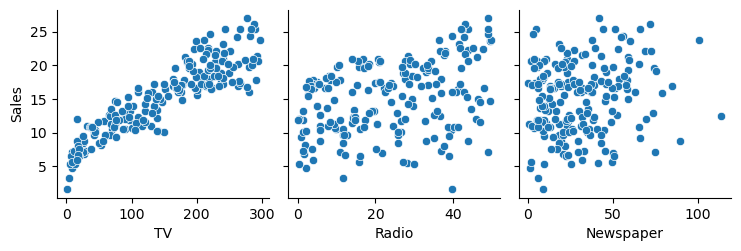

In [256]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

- Above plot shows how Sales are realted with other variable using Scatter plot.

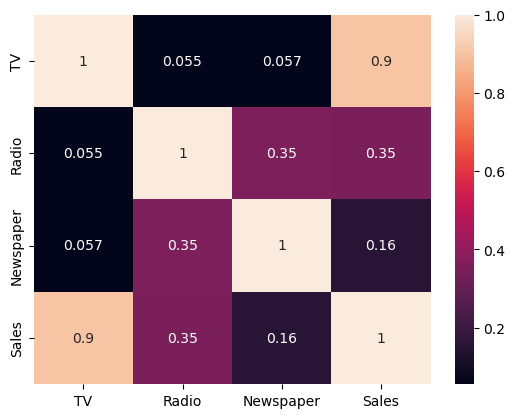

In [257]:
# let's see the corealation between the variable
sns.heatmap(df.corr(),annot=True)
plt.show()

- As is visible from the pairplot and heatmap, the variable TV seems to be most corealated with Sales.

### Machine Learning Model Building

In [258]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [259]:
X=sm.add_constant(df[['TV','Radio','Newspaper']])
y=df['Sales']

In [260]:
X

,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4
...,...,...,...,...
195,1.0,38.2,3.7,13.8
196,1.0,94.2,4.9,8.1
197,1.0,177.0,9.3,6.4
198,1.0,283.6,42.0,66.2


In [261]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [262]:
model=sm.OLS(y,X).fit()

In [263]:
model.params

const        4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [264]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           8.13e-99
Time:                        15:29:18   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,train_size=0.3)

In [267]:
model=sm.OLS(y_train,X_train).fit()

In [268]:
model.params

const        4.993768
TV           0.053849
Radio        0.108602
Newspaper   -0.016394
dtype: float64

In [269]:
pred_y=model.predict(X_test)
pred_y

37     13.632032
109    21.578042
31     12.330197
89     15.254925
66      9.325557
         ...    
86     11.826704
163    17.673327
20     18.887243
151    11.623378
10      8.786350
Length: 140, dtype: float64

#### Model Evaluation

In [270]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [271]:
MAE=mean_absolute_error(y_test,pred_y)
MAE

1.3250530170213104


- Mean_Absolute_Error it is common metric used to measure the accuracy of predictions made by a Multi_Linear_Regression model.
- Here we get the GOOD MAE value.

In [272]:
# mean_absolute_percentage_error - it measures percentage difference between predicted and actual values.
MAPE=mean_absolute_percentage_error(y_test,pred_y)
MAPE

0.12661456593959233

In [273]:
# R-squared score- also known as the coefficient of determination, is a statistical metric used to evaluate the goodness 
# of fit of regression model.
r2_score(y_test,pred_y)*100

89.00776213959472

In [274]:
new_data=[[149,22,12]]

### Polynomial Regression

In [275]:
from sklearn.preprocessing import PolynomialFeatures

In [276]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [277]:
# x1,x2,x3
#x^1.2, x1.x2,x2.x3
#x2^2, x2.x3
#x3^2
#feature_engineering
poly_instance=PolynomialFeatures(degree=2,include_bias=True)

In [278]:
# fit and transform are two stages of the generating the new features of the dataset.
# fit is the first stage where calculation are just made ready.

poly_instance.fit(X)

PolynomialFeatures()

In [279]:
poly_features=poly_instance.transform(X)
poly_features

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

In [280]:
# poly features
X.shape

(200, 3)

In [281]:
poly_features.shape

(200, 10)

In [282]:
X = poly_features

In [283]:
X

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

In [284]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [285]:
model=sm.OLS(y,X).fit()  # new X poly features

In [286]:
model.params

const    5.288596
x1       0.076181
x2      -0.037179
x3      -0.009998
x4      -0.000111
x5       0.000424
x6      -0.000009
x7       0.001703
x8       0.000140
x9       0.000115
dtype: float64

In [287]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     306.2
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          4.97e-108
Time:                        15:29:39   Log-Likelihood:                -342.10
No. Observations:                 200   AIC:                             704.2
Df Residuals:                     190   BIC:                             737.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2886      0.529      9.996      0.000       4.245       6.332
x1             0.0762      0.005     15.320      0.000       0.066       0.086
x2            -0.0372      0.028     -1.335      0.184      -0.092       0.018
x3            -0.0100      0.018     -0.566      0.572      -0.045       0.025
x4            -0.0001   1.54e-05     -7.180      0.000      -0.000   -8.02e-05
x5             0.0004   8.43e-05      5.032      0.000       0.000       0.001
x6         -9.139e-06   5.26e-05     -0.174      0.862      -0.000    9.47e-05
x7             0.0017      0.001      3.148      0.002       0.001       0.003
x8             0.0001      0.000      0.372      0.710      -0.001       0.001
x9             0.0001      0.000      0.710      0.478      -0.000       0.000
==============================================================================
Omnibus:                        8.568   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               13.594
Skew:                          -0.206   Prob(JB):                      0.00112
Kurtosis:                       4.209   Cond. No.                     2.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using Train_Test_Split

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X_train,X_test,y_train,y_test= train_test_split(X,y ,random_state=101,train_size=0.7)

In [290]:
model=sm.OLS(y_train,X_train).fit()

In [291]:
model.params

const    5.090059
x1       0.077494
x2      -0.030130
x3      -0.007938
x4      -0.000111
x5       0.000513
x6      -0.000065
x7       0.001225
x8       0.000143
x9       0.000168
dtype: float64

In [292]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     217.7
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           6.89e-74
Time:                        15:29:43   Log-Likelihood:                -236.25
No. Observations:                 140   AIC:                             492.5
Df Residuals:                     130   BIC:                             521.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0901      0.618      8.241      0.000       3.868       6.312
x1             0.0775      0.006     12.813      0.000       0.066       0.089
x2            -0.0301      0.033     -0.906      0.366      -0.096       0.036
x3            -0.0079      0.022     -0.358      0.721      -0.052       0.036
x4            -0.0001    1.9e-05     -5.862      0.000      -0.000   -7.37e-05
x5             0.0005      0.000      5.028      0.000       0.000       0.001
x6         -6.476e-05   6.91e-05     -0.938      0.350      -0.000    7.19e-05
x7             0.0012      0.001      1.899      0.060   -5.13e-05       0.003
x8             0.0001      0.000      0.330      0.742      -0.001       0.001
x9             0.0002      0.000      0.744      0.458      -0.000       0.001
==============================================================================
Omnibus:                        4.071   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                4.730
Skew:                          -0.126   Prob(JB):                       0.0939
Kurtosis:                       3.865   Cond. No.                     2.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [293]:
pred_y=model.predict(X_test)

In [294]:
pred_y

array([13.7417868 , 21.11465035, 13.03287882, 16.32971764,  7.80477439,
        6.47196239, 21.5082459 , 19.0421605 , 13.71941246, 20.45076614,
        9.40347263, 16.44490091, 16.86426357, 22.42107345, 19.7060873 ,
        8.88541282, 17.74252886, 11.42240955,  8.68116931, 21.6053278 ,
        6.59854981, 19.05685766, 25.920224  , 23.8876459 , 10.05235666,
       15.86265471, 22.48590423,  9.37299133, 15.2912304 ,  8.62901146,
        8.18847701, 20.44692196, 13.57650614,  6.12241983, 18.39803797,
       11.33457734, 11.14885676, 11.42424382,  6.94872289, 14.50078817,
       13.02079273, 13.5034604 , 11.85348782,  6.76226008, 11.35735187,
       10.42705847,  5.75971838, 18.02533557, 15.79937077, 21.85535098,
       10.03082366, 16.67128788, 18.89080328, 13.28163879, 15.96958067,
        5.21382857, 24.78055401,  9.61979517, 20.42833847, 16.87128738])

In [295]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [296]:
# mean_absolute_error
MAE=mean_absolute_error(y_test,pred_y)
MAE

1.1548027507564398

In [297]:
# mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(y_test,pred_y)
MAPE

0.09395644736777119

In [298]:
r2_score(y_test,pred_y)

0.9237023998708825

- The R2 score, also known as the coefficient of determinatio,is a stastical measure used to assess the goodness of fit
of a regression model.
- The R2 score ranges from 0 to 1, here we get the 0.9237 this indicate that a better fit.

### Choosing the best Degree of Polynomial

In [299]:
data=pd.read_csv(r'advertising.csv')
df=pd.DataFrame(data = data)

X=df.drop('Sales',axis=1)
Y=df['Sales']

In [300]:
train_mape_lst=[]
test_mape_lst=[]

for i in range(1,10):
    
    poly_instance = PolynomialFeatures(degree=i,include_bias= False)
    
    poly_features = poly_instance.fit_transform(X)
    
    X_train,X_test,Y_train,Y_test = train_test_split(poly_features,Y,train_size=0.7,random_state=101)
    
    model=sm.OLS(Y_train,X_train).fit()
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mape= mean_absolute_percentage_error(Y_train,train_pred)
    test_mape= mean_absolute_percentage_error(Y_test,test_pred)
    
    train_mape_lst.append(train_mape)
    test_mape_lst.append(test_mape)

In [301]:
train_mape_lst

[0.17350988860108016,
 0.11297206722352933,
 0.09106899375609545,
 0.0675062457149638,
 0.052013512946380326,
 0.036896789581630486,
 0.04097132502534538,
 0.057326885543921846,
 0.04840093952242264]

In [302]:
test_mape_lst

[0.15171440486197982,
 0.1118409617210067,
 0.09245734919319301,
 0.08128102172391305,
 0.13687183441990078,
 0.22058101687059253,
 12.37166914444109,
 163.21789284235447,
 3922.366342408642]

In [303]:
pd.DataFrame({'Train_mape':train_mape_lst,'Test_mape':test_mape_lst})

,Train_mape,Test_mape
0,0.173510,0.151714
1,0.112972,0.111841
2,0.091069,0.092457
3,0.067506,0.081281
4,0.052014,0.136872
5,0.036897,0.220581
6,0.040971,12.371669
7,0.057327,163.217893
8,0.048401,3922.366342


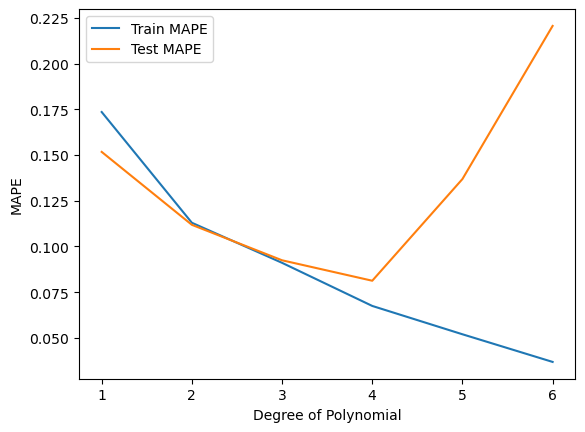

In [304]:
plt.plot(range(1,7),train_mape_lst[:6],label='Train MAPE')
plt.plot(range(1,7),test_mape_lst[:6],label='Test MAPE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MAPE')
plt.legend()
plt.show()

## Final Model

In [305]:
data=pd.read_csv(r'advertising.csv')
df = pd.DataFrame(data = data)
X = df.drop('Sales',axis=1)
Y = df['Sales']

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [306]:
final_poly_instance = PolynomialFeatures(degree=3,include_bias=False)
final_poly_features= final_poly_instance.fit_transform(X)
final_poly_features.shape

(200, 19)

In [307]:
final_model=sm.OLS(Y,final_poly_features).fit()

In [308]:
## Prediction with final model
new_data=[[180.8,10.8,58.4]]

In [309]:
# convert the new data into new polynomial features
test_poly_features=final_poly_instance.fit_transform(new_data)

In [310]:
result=final_model.predict(test_poly_features)

In [311]:
result

array([16.32402853])

In [312]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1328.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):                   2.35e-183
Time:                        15:29:59   Log-Likelihood:                         -344.11
No. Observations:                 200   AIC:                                      726.2
Df Residuals:                     181   BIC:                                      788.9
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1349      0.011     11.770      0.000       0.112       0.157
x2             0.3504      0.068      5.129      0.000       0.216       0.485
x3             0.0702      0.037      1.883      0.061      -0.003       0.144
x4            -0.0003   9.18e-05     -3.677      0.000      -0.001      -0.000
x5            -0.0010      0.000     -2.386      0.018      -0.002      -0.000
x6            -0.0007      0.000     -2.633      0.009      -0.001      -0.000
x7            -0.0105      0.003     -3.244      0.001      -0.017      -0.004
x8            -0.0020      0.002     -1.013      0.312      -0.006       0.002
x9             0.0003      0.001      0.298      0.766      -0.002       0.002
x10         2.885e-07   2.09e-07      1.382      0.169   -1.23e-07       7e-07
x11         1.634e-06   1.23e-06      1.327      0.186   -7.96e-07    4.06e-06
x12         1.519e-06   8.35e-07      1.819      0.071   -1.29e-07    3.17e-06
x13         1.425e-05   7.01e-06      2.031      0.044    4.09e-07    2.81e-05
x14         7.262e-06   5.36e-06      1.355      0.177   -3.32e-06    1.78e-05
x15        -1.044e-07   2.12e-06     -0.049      0.961   -4.28e-06    4.08e-06
x16            0.0001    4.7e-05      2.800      0.006    3.89e-05       0.000
x17         9.021e-06   2.98e-05      0.303      0.762   -4.97e-05    6.78e-05
x18        -9.246e-07   1.64e-05     -0.056      0.955   -3.32e-05    3.14e-05
x19        -9.334e-07   5.74e-06     -0.163      0.871   -1.23e-05    1.04e-05
==============================================================================
Omnibus:                        3.868   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                4.299
Skew:                          -0.130   Prob(JB):                        0.117
Kurtosis:                       3.669   Cond. No.                     6.65e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""